# 1. Step by Step

In [108]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [40]:
# 打开文件并读取数据
with open('output.txt', 'r') as file:
    lines = file.readlines()

# 创建一个空的二维列表
sensat = []

# 遍历文件的每一行并将其拆分为列表
for line in lines:
    # 使用制表符或空格分割行中的数据
    row = line.strip().split(' ')  # 如果数据是用制表符分隔，使用'\t'，如果是用空格分隔，使用' '
    # 将拆分后的行添加到二维列表
    sensat.append(row)
sensat[0]

['0.4192465037605961',
 '0.0027902174896920584',
 '0.015648090534505787',
 '0.012665522662399965',
 '0.0011660651684655254',
 '0.062233592329254',
 '0.010478476209267059',
 '0.028460572229923705',
 '0.012636124004958636',
 '0.0015294753493584705',
 '0.025756430967019725',
 '0.0005013032608210695',
 '0.00907440986027374']

In [41]:
for i in range(len(sensat)):
    for j in range(len(sensat[0])):
        sensat[i][j] = float(sensat[i][j])
len(sensat)

11

In [59]:
class_id = ['Ground', 'High Vegetation', 'Buildings', 'Walls', 'Parking', 'Rail', 'Traffic Roads', 'Street Furniture', 'Cars', 'Footpath', 'Water']

data_dict = {}
for i in range(len(class_id)):
    data_dict[class_id[i]] = sensat[i]
data_dict

{'Ground': [0.4192465037605961,
  0.0027902174896920584,
  0.015648090534505787,
  0.012665522662399965,
  0.0011660651684655254,
  0.062233592329254,
  0.010478476209267059,
  0.028460572229923705,
  0.012636124004958636,
  0.0015294753493584705,
  0.025756430967019725,
  0.0005013032608210695,
  0.00907440986027374],
 'High Vegetation': [0.004241750680093946,
  0.5812846608167095,
  0.016235159851640178,
  0.013583137112887063,
  0.00011596721226071101,
  0.00014302842191881717,
  0.002092066818313405,
  6.363001962481483e-05,
  0.004941773005616582,
  0.00016163197651454934,
  0.00010440403129905926,
  3.786623251806673e-05,
  0.0008629027370918613],
 'Buildings': [0.008767139949899331,
  0.0049578029859930865,
  0.5650430100615145,
  0.008842457716009451,
  0.0026121796254455175,
  0.002044257737869272,
  0.0006313084379280336,
  0.0014561767367884662,
  0.019081855798680516,
  0.0014945367138049874,
  0.0010632178307695545,
  0.0002262623695975454,
  0.00011974624165590849],
 'Wal

In [61]:
df = pd.DataFrame(data_dict,columns=class_id)
df

,Ground,High Vegetation,Buildings,Walls,Parking,Rail,Traffic Roads,Street Furniture,Cars,Footpath,Water
0,0.419247,0.004242,0.008767,0.048161,0.102841,0.105719,0.055618,0.039129,0.007508,0.122251,0.162152
1,0.002790,0.581285,0.004958,0.024389,0.000049,0.029184,0.000050,0.006573,0.000178,0.000078,0.007110
2,0.015648,0.016235,0.565043,0.053925,0.004151,0.029996,0.004178,0.091696,0.004496,0.005553,0.003088
3,0.012666,0.013583,0.008842,0.377497,0.000418,0.002559,0.002002,0.066555,0.001514,0.021288,0.020316
4,0.001166,0.000116,0.002612,0.001168,0.001323,0.003512,0.004833,0.002235,0.001130,0.001784,0.000313
5,0.062234,0.000143,0.002044,0.004679,0.357264,0.049132,0.126387,0.014417,0.028508,0.042031,0.055329
6,0.010478,0.002092,0.000631,0.001299,0.003942,0.306247,0.000711,0.002735,0.000361,0.000166,0.040966
7,0.028461,0.000064,0.001456,0.005097,0.105324,0.010149,0.358754,0.009138,0.022169,0.162724,0.012577
8,0.012636,0.004942,0.019082,0.088139,0.003074,0.024272,0.003590,0.319577,0.025419,0.008570,0.044399
9,0.001529,0.000162,0.001495,0.003813,0.012736,0.004193,0.008259,0.041735,0.516410,0.001305,0.006346


In [65]:
corr = df.corr()
corr

,Ground,High Vegetation,Buildings,Walls,Parking,Rail,Traffic Roads,Street Furniture,Cars,Footpath,Water
Ground,1.000000,-0.114557,-0.073065,-0.008070,0.298211,0.214465,0.103924,-0.039813,-0.112316,0.341951,0.473138
High Vegetation,-0.114557,1.000000,-0.057678,-0.045683,-0.147479,-0.063871,-0.152061,-0.132737,-0.106690,-0.186518,-0.168056
Buildings,-0.073065,-0.057678,1.000000,0.034308,-0.130842,-0.062872,-0.136780,0.182791,-0.095195,-0.161905,-0.179541
Walls,-0.008070,-0.045683,0.034308,1.000000,-0.170180,-0.170701,-0.184721,0.290420,-0.136102,-0.117401,-0.091121
Parking,0.298211,-0.147479,-0.130842,-0.170180,1.000000,0.028824,0.499058,-0.163375,-0.050810,0.204814,0.114664
Rail,0.214465,-0.063871,-0.062872,-0.170701,0.028824,1.000000,-0.123270,-0.138862,-0.163000,-0.129951,0.188569
Traffic Roads,0.103924,-0.152061,-0.136780,-0.184721,0.499058,-0.123270,1.000000,-0.193306,-0.075107,0.575189,-0.085325
Street Furniture,-0.039813,-0.132737,0.182791,0.290420,-0.163375,-0.138862,-0.193306,1.000000,0.011520,-0.192681,-0.059287
Cars,-0.112316,-0.106690,-0.095195,-0.136102,-0.050810,-0.163000,-0.075107,0.011520,1.000000,-0.159705,-0.170452
Footpath,0.341951,-0.186518,-0.161905,-0.117401,0.204814,-0.129951,0.575189,-0.192681,-0.159705,1.000000,-0.006177


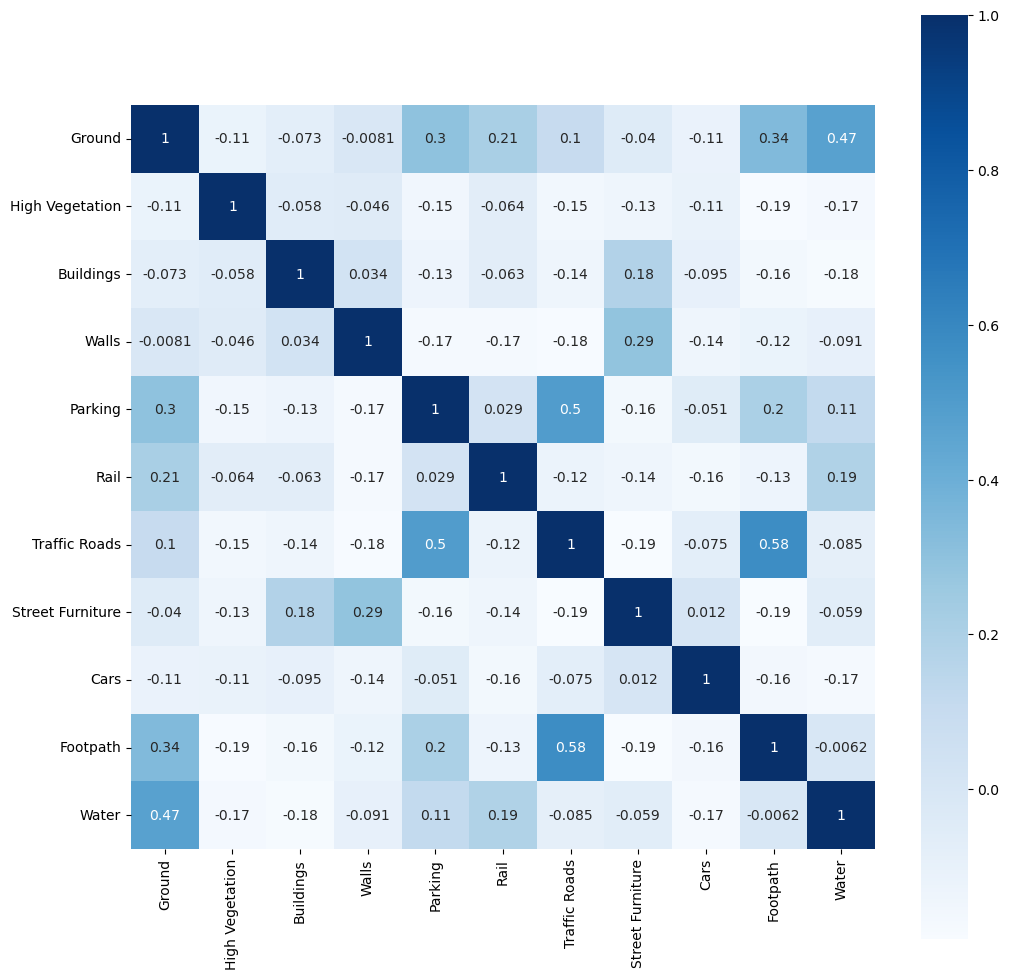

In [69]:
plt.subplots(figsize = (12,12))
sns.heatmap(corr,annot = True,vmax = 1,square = True,cmap = "Blues")
plt.show()

# 2. Final

In [109]:
def obtain_corr(file): 
    # 打开文件并读取数据
    with open(file, 'r') as file:
        lines = file.readlines()

    # 创建一个空的二维列表
    sensat = []

    # 遍历文件的每一行并将其拆分为列表
    for line in lines:
        # 使用制表符或空格分割行中的数据
        row = line.strip().split(' ')  # 如果数据是用制表符分隔，使用'\t'，如果是用空格分隔，使用' '
        # 将拆分后的行添加到二维列表
        sensat.append(row)
    for i in range(len(sensat)):
        for j in range(len(sensat[0])):
            sensat[i][j] = float(sensat[i][j])

    class_id = ['Ground', 'High Vegetation', 'Buildings', 'Walls', 'Parking', 'Rail', 'Traffic Roads', 'Street Furniture', 'Cars', 'Footpath', 'Water']

    data_dict = {}
    for i in range(len(class_id)):
        data_dict[class_id[i]] = sensat[i]
    df = pd.DataFrame(data_dict,columns=class_id)
    corr = df.corr()
    return corr

In [114]:
def plot_corr(corr_randla,corr_tcfap):
    fig, axes = plt.subplots(1, 2, figsize=(24, 12))
    font = FontProperties(fname="TIMES.TTF", size=12)
    # 第一个热图
    sns.heatmap(corr_randla, annot=True, vmax=1, square=True, cmap="Blues", ax=axes[0], cbar=False, annot_kws={"fontproperties": font})
    axes[0].set_title('Correlation Matrix 1', fontproperties=font)

    # 第二个热图
    sns.heatmap(corr_tcfap, annot=True, vmax=1, square=True, cmap="Blues", ax=axes[1], cbar=False, annot_kws={"fontproperties": font})
    axes[1].set_title('Correlation Matrix 2', fontproperties=font)
    plt.colorbar(axes[1].collections[0], ax=axes, location="right")
    plt.savefig('tw.pdf', format='pdf', bbox_inches='tight')
    plt.show()

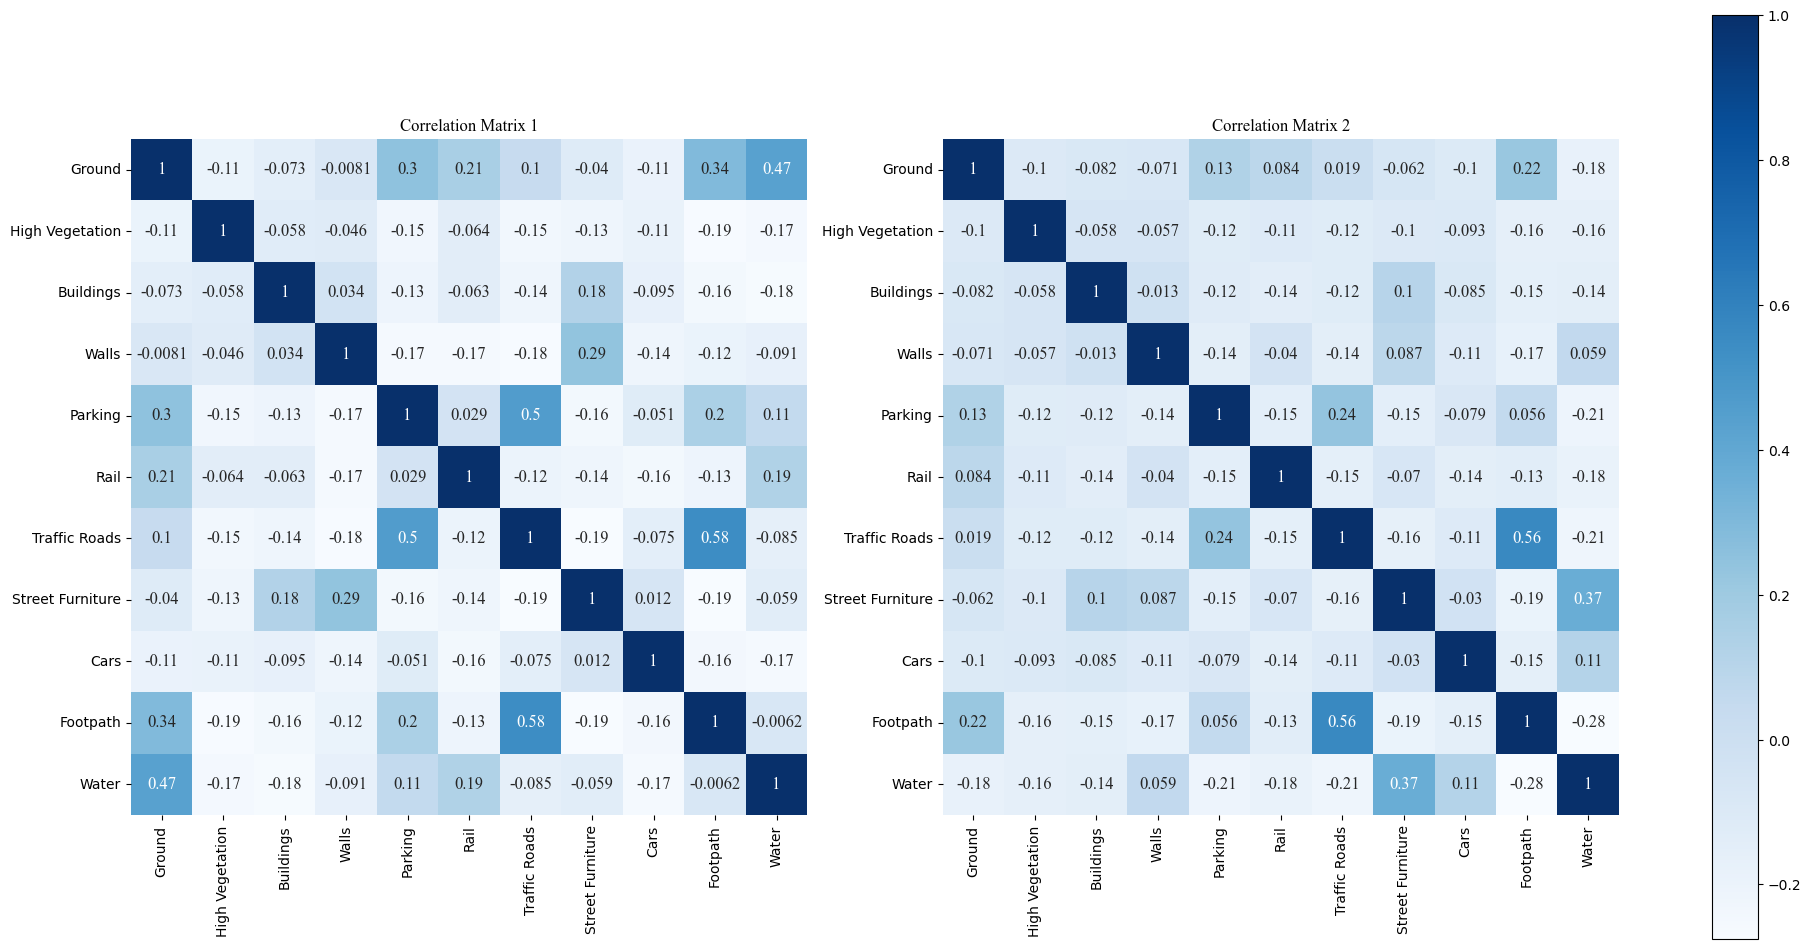

In [115]:
plot_corr(obtain_corr("output.txt"),obtain_corr("output_tcfap.txt"))